In [255]:
import imp
import sys
sys.path.append('/Users/kook/insight/windsite/src')
# import wind
# imp.reload(wind)
# import wind
import seaborn as sns
import transdist
imp.reload(transdist)
import transdist

import imp
import roads
imp.reload(roads)
import roads

import pandas as pd
import numpy as np
import geopandas as gpd
import requests
from shapely.geometry import Point
from matplotlib import pyplot as plt
%matplotlib inline
import time

import gmaps
import os
gmaps.configure(api_key=os.environ["GOOGLE_API_KEY"])
import json

print('Libraries loaded.')

Libraries loaded.


# nrel techno sites

In [4]:
nrel_us = pd.read_csv('../data/nrel-techno-sites.csv')
print(len(nrel_us))
nrel_state = nrel_us[(nrel_us.State == 'Texas')]
print(len(nrel_state))
point_list = list(zip(nrel_state['latitude'],nrel_state['longitude']))
nrel_state.head()

126692
7869


,site_id,longitude,latitude,State,County,fraction_of_usable_area,power_curve,capacity,wind_speed,capacity_factor,full_timeseries_directory,full_timeseries_path
169,169,-97.460358,25.896492,Texas,Cameron,0.0049,2,2,7.46,0.433,0,0/169.nc
251,251,-97.738098,26.032654,Texas,Cameron,0.5680,2,10,7.45,0.414,0,0/251.nc
288,288,-97.208252,26.059063,Texas,Cameron,0.0801,2,2,8.18,0.506,0,0/288.nc
367,367,-98.073364,26.078449,Texas,Hidalgo,0.9851,2,16,7.17,0.363,0,0/367.nc
494,494,-98.311340,26.143227,Texas,Hidalgo,0.9475,2,16,7.06,0.358,0,0/494.nc


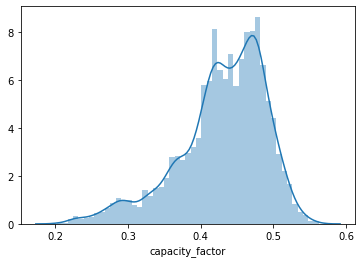

In [171]:
sns.distplot(nrel_state['capacity_factor'])

# transmission

In [94]:
%time transdist.find_closest_trans_point(point_list[1])

CPU times: user 30.5 s, sys: 155 ms, total: 30.7 s
Wall time: 30.9 s


(882, (26.0871967721134, -97.7856351906115), 4.778611523323892)

In [91]:
transdist.get_tx('../data/long-trans-data-TX.geojson')
%time trans_idx_list,trans_point_list,trans_dist_list = list(zip(*[transdist.find_closest_trans_point(latlon) for latlon in point_list[:5]]))

KeyboardInterrupt: 

In [81]:
trans_df = pd.DataFrame({
    'site_id' : nrel_ca['site_id'],
    'trans_idx' : trans_idx_list,
    'latitude' : [latlon[0] for latlon in trans_point_list],
    'longitude': [latlon[1] for latlon in trans_point_list],
    'distance': trans_dist_list
})
trans_df

,site_id,trans_idx,latitude,longitude,distance
14960,14960,21,32.760762,-114.758057,0.489166
14961,14961,21,32.755820,-114.737533,0.144866
15019,15019,21,32.760918,-114.785208,0.429378
15020,15020,21,32.760782,-114.763691,0.730965
15021,15021,788,32.772353,-114.748950,0.422307
...,...,...,...,...,...
105964,105964,807,41.929079,-122.365740,4.953008
106091,106091,882,41.728283,-122.630512,11.365939
106312,106312,851,41.936491,-123.828342,26.184677
106583,106583,882,41.728283,-122.630512,26.690433


In [157]:
trans_df = pd.read_pickle('../data/trans-df-tx.pkl')
trans_df

,site_id,trans_idx,latitude,longitude,distance
169,169,833,25.888472,-97.424833,2.279919
251,251,882,26.087197,-97.785635,4.778612
288,288,848,26.084680,-97.267434,4.080237
367,367,885,26.078824,-98.075022,0.106241
494,494,884,26.103226,-98.213942,6.649775
...,...,...,...,...,...
27791,27791,644,36.081104,-102.532032,36.307250
27965,27965,644,36.081104,-102.532032,38.899448
27966,27966,644,36.081104,-102.532032,38.092980
27967,27967,644,36.081104,-102.532032,35.838002


(array([6176.,  904.,  403.,  126.,   19.,   84.,   36.,   34.,   50.,
          37.]),
 array([1.02975933e-02, 1.23032493e+01, 2.45962010e+01, 3.68891527e+01,
        4.91821043e+01, 6.14750560e+01, 7.37680077e+01, 8.60609594e+01,
        9.83539111e+01, 1.10646863e+02, 1.22939814e+02]),
 <a list of 10 Patch objects>)

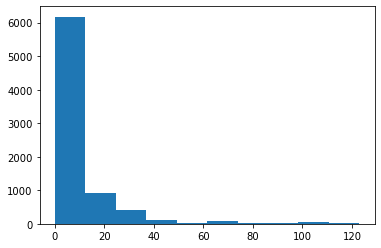

In [160]:
plt.hist(trans_df['distance'])

In [11]:
3932/10/60

6.553333333333333

In [19]:
#special gdf = select special transmission lines
transdist.special_gdf.drop('bounds',axis=1).to_file("special_trans_gdf.geojson", driver='GeoJSON')
with open('special_trans_gdf.geojson','r') as f : 
    special_gdf_geojson = json.load(f)
trans_layer = gmaps.geojson_layer(special_gdf_geojson,stroke_color=(0,0,0))

# roads

In [234]:
roads.get_closest_road_radii(latlon,debug=False,valid_highways = ['residential'])

((26.0614638, -97.2059371), 0.21916479798980912, 'residential')

In [241]:
nrel_state['site_id'].iloc[i]

169

## find residential roads

In [274]:
#find closest residential roads
#find closest roads
#road_coords, road_dists = list(zip(*[roads.get_closest_road(latlon,debug=True) for latlon in grid_point_list[:]]))
#res_road_data_list = []
#i = 0
while i < len(point_list[:]):
    if i%50 == 0:
        print(i)
    latlon = point_list[i]
    res_road_data_list.append((nrel_state['site_id'].iloc[i],i) + roads.get_closest_road_radii(latlon,debug=False,valid_highways = ['residential']))
    i = i + 1

5850
5900
5950
6000
6050
6100
6150
6200
6250
6300
6350
6400
6450
6500
6550
6600
6650
6700
6750
6800
6850
6900
6950
7000
7050
7100
7150
7200
7250
7300
7350
7400
7450
7500
7550
7600
7650
7700
7750
7800
7850


In [275]:
print(len(res_road_data_list),i)

7869 7869


In [279]:
assert(np.all(nrel_state['site_id'].iloc[:len(res_road_data_list)] == [x[0] for x in res_road_data_list]))

In [277]:
res_road_df= pd.DataFrame((lambda rlist: {'site_id' : nrel_state['site_id'].iloc[:len(res_road_data_list)], 'i' : rlist[1], 'latitude' : [x[0] for x in rlist[2]],
              'longitude' : [x[1] for x in rlist[2]] ,'distance' : rlist[3], 'label' : rlist[4]})(list(zip(*res_road_data_list)))
            )
display(res_road_df)
#fres_road_df.to_pickle('../data/nrel-techno-tx/roads/res-road0:f7869.pkl',protocol=3)


,site_id,i,latitude,longitude,distance,label
169,169,0,25.896713,-97.459846,0.035290,residential
251,251,1,26.031307,-97.736630,0.130132,residential
288,288,2,26.061464,-97.205937,0.219165,residential
367,367,3,26.077726,-98.068152,0.327825,residential
494,494,4,26.140845,-98.305813,0.380563,residential
...,...,...,...,...,...,...
27791,27791,7864,36.512588,-103.014083,3.853156,residential
27965,27965,7865,36.492353,-103.053419,1.844439,residential
27966,27966,7866,36.512465,-103.014439,2.187866,residential
27967,27967,7867,36.486838,-102.905068,1.507610,residential


In [282]:
len(res_road_df.dropna())

7662

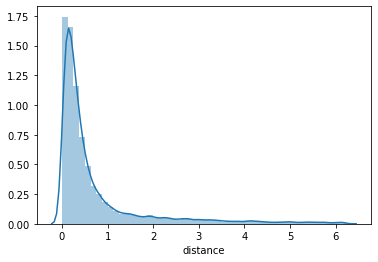

In [278]:
sns.distplot(res_road_df['distance'])

/Users/kook/opt/anaconda3/envs/insight_h5py/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/kook/opt/anaconda3/envs/insight_h5py/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([  10.,   43.,  165.,  376.,  918., 1806., 2005., 1150.,  690.,
         499.]),
 array([-2.66326894, -2.31755457, -1.9718402 , -1.62612584, -1.28041147,
        -0.9346971 , -0.58898273, -0.24326837,  0.102446  ,  0.44816037,
         0.79387474]),
 <a list of 10 Patch objects>)

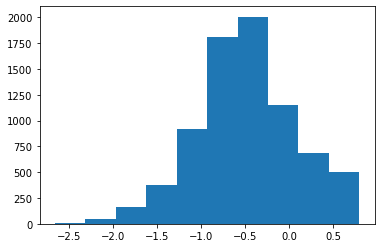

In [289]:
plt.hist(np.log10(res_road_df['distance']))

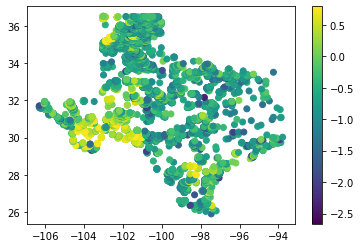

In [292]:
plt.scatter(res_road_df['longitude'],res_road_df['latitude'],c=np.log10(res_road_df['distance'])); plt.colorbar()

## find viable roads

In [152]:
#find closest roads
#road_coords, road_dists = list(zip(*[roads.get_closest_road(latlon,debug=True) for latlon in grid_point_list[:]]))
road_data_list = []
i = 0
while i < len(point_list[:]):
    if i%50 == 0:
        print(i)
    latlon = point_list[i]
    road_data_list.append((i,) + roads.get_closest_road_radii(latlon,debug=False,))
    i = i + 1

5450
5500
5550
5600
5650
5700
5750
5800
5850
5900
5950
6000
6050
6100
6150
6200
6250
6300
6350
6400
6450
6500
6550
6600
6650
6700
6750
6800
6850
6900
6950
7000
7050
7100
7150
7200
7250
7300
7350
7400
7450
7500
7550
7600
7650
7700
7750
7800
7850


In [153]:
print(len(road_data_list),i)

7869 7869


In [147]:
len(point_list)

7869

In [146]:
len(road_data_list)

5438

In [154]:
road_df= pd.DataFrame((lambda rlist: {'site_id' : nrel_state['site_id'].iloc[:len(road_data_list)], 'i' : rlist[0], 'latitude' : [x[0] for x in rlist[1]],
              'longitude' : [x[1] for x in rlist[1]] ,'distance' : rlist[2], 'label' : rlist[3]})(list(zip(*road_data_list)))
            )
display(road_df)
#froad_df.to_pickle('../data/nrel-techno-tx/roads/nonres-road0:f7869.npy',protocol=3)

,site_id,i,latitude,longitude,distance,label
169,169,0,25.896175,-97.460796,0.034964,tertiary
251,251,1,26.032830,-97.738788,0.044568,primary
288,288,2,26.071840,-97.216763,1.026501,primary
367,367,3,26.078643,-98.074974,0.100975,primary
494,494,4,26.143035,-98.312744,0.088229,trunk
...,...,...,...,...,...,...
27791,27791,7864,36.448977,-103.009130,2.201790,unclassified
27965,27965,7865,36.480363,-103.025504,0.134556,unclassified
27966,27966,7866,36.500527,-103.000867,1.223024,unclassified
27967,27967,7867,36.500452,-102.932340,0.886875,unclassified


In [156]:
np.count_nonzero(road_df['label'] == 'none')

1601

/Users/kook/opt/anaconda3/envs/insight_h5py/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/kook/opt/anaconda3/envs/insight_h5py/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([1296., 1090.,  875.,  700.,  580.,  487.,  387.,  339.,  291.,
         223.]),
 array([8.80706622e-04, 3.13659290e-01, 6.26437873e-01, 9.39216457e-01,
        1.25199504e+00, 1.56477362e+00, 1.87755221e+00, 2.19033079e+00,
        2.50310937e+00, 2.81588796e+00, 3.12866654e+00]),
 <a list of 10 Patch objects>)

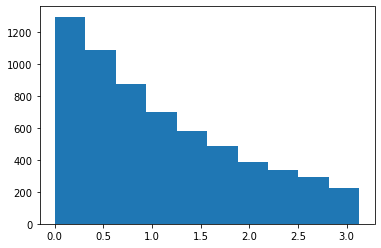

In [155]:
plt.hist(road_df['distance'])

## compare viable and residential road distance

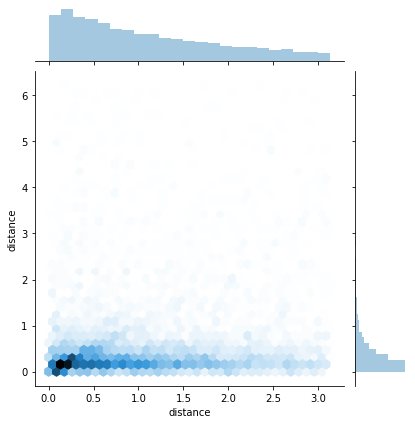

In [287]:
sns.jointplot(road_df['distance'],res_road_df['distance'],kind='hex')

# incorporate model data

In [161]:
import pickle as pkl
with open('../models/land-price-17.pkl','rb') as f:
    land_value_model = pkl.load(f)
with open('../models/cf-model-17.pkl','rb') as f:
    capacity_class_model = pkl.load(f)

In [182]:
import models
X_cap = pd.concat([nrel_state[['site_id','longitude','capacity_factor']].set_index('site_id'),
               pd.DataFrame({'p_year' : np.full([len(nrel_state)],2017)},index=nrel_state['site_id'])],axis=1)
#y_cap = capacity_class_model.predict(X_cap)
best_threshold = 0.7420621909792579
y_cap = models.pred_thresh(capacity_class_model,X_cap,th=best_threshold)
print(np.count_nonzero(y_cap),'/',len(y_cap))
capacity_class = y_cap

101 / 7869


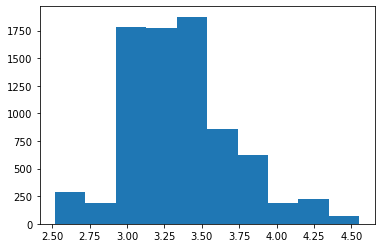

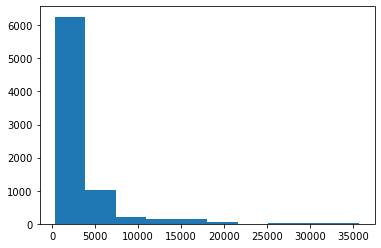

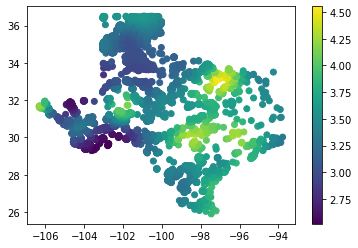

In [189]:
X_land = nrel_state[['latitude','longitude']]
y_land,y_land_std = land_value_model.predict(X_land,return_std=True)
land_value = 10**y_land
plt.hist(y_land); plt.show()
plt.hist(land_value); plt.show()
plt.scatter(X_land.iloc[:,1],X_land.iloc[:,0],c=y_land); plt.colorbar(); plt.show()

# combine data

In [185]:
nrel_state.columns

Index(['site_id', 'longitude', 'latitude', 'State', 'County',
       'fraction_of_usable_area', 'power_curve', 'capacity', 'wind_speed',
       'capacity_factor', 'full_timeseries_directory', 'full_timeseries_path'],
      dtype='object')

In [186]:
#make sure all site ids match
np.all((nrel_state['site_id'] == trans_df['site_id']) & (nrel_state['site_id'] == road_df['site_id']))

True

In [294]:
nrel_names = 'site_id,latitude,longitude,County,capacity_factor'.split(',')
trans_names = 'site_id,trans_idx,latitude,longitude,distance'.split(',')
road_names = 'site_id,latitude,longitude,distance'.split(',')
res_road_names = 'site_id,latitude,longitude,distance'.split(',')
df = pd.concat([
    nrel_state[nrel_names].set_index('site_id'),
    trans_df[trans_names].set_index('site_id'),
    road_df[road_names].set_index('site_id'),
    res_road_df[res_road_names].set_index('site_id'),
    pd.DataFrame({
        'site_id' : nrel_state['site_id'], 'capacity_class' : capacity_class,
        'land_value' : land_value,'land_value_logstd' : y_land_std
    }).set_index('site_id')
],axis=1,keys=['nrel','trans','road','res_road','ML'])
df

nrel                                          trans             \
          latitude   longitude   County capacity_factor trans_idx   latitude   
site_id                                                                        
169      25.896492  -97.460358  Cameron           0.433       833  25.888472   
251      26.032654  -97.738098  Cameron           0.414       882  26.087197   
288      26.059063  -97.208252  Cameron           0.506       848  26.084680   
367      26.078449  -98.073364  Hidalgo           0.363       885  26.078824   
494      26.143227  -98.311340  Hidalgo           0.358       884  26.103226   
...            ...         ...      ...             ...       ...        ...   
27791    36.466068 -102.975739   Dallam           0.436       644  36.081104   
27965    36.481190 -103.023315   Dallam           0.420       644  36.081104   
27966    36.482792 -103.000519   Dallam           0.420       644  36.081104   
27967    36.487591 -102.932129   Dallam           0.445       644  36.081104   
28131    36.499516 -103.025330   Dallam           0.444       644  36.081104   

                                     road                         res_road  \
          longitude   distance   latitude   longitude  distance   latitude   
site_id                                                                      
169      -97.424833   2.279919  25.896175  -97.460796  0.034964  25.896713   
251      -97.785635   4.778612  26.032830  -97.738788  0.044568  26.031307   
288      -97.267434   4.080237  26.071840  -97.216763  1.026501  26.061464   
367      -98.075022   0.106241  26.078643  -98.074974  0.100975  26.077726   
494      -98.213942   6.649775  26.143035  -98.312744  0.088229  26.140845   
...             ...        ...        ...         ...       ...        ...   
27791   -102.532032  36.307250  36.448977 -103.009130  2.201790  36.512588   
27965   -102.532032  38.899448  36.480363 -103.025504  0.134556  36.492353   
27966   -102.532032  38.092980  36.500527 -103.000867  1.223024  36.512465   
27967   -102.532032  35.838002  36.500452 -102.932340  0.886875  36.486838   
28131   -102.532032  39.880884  36.500528 -103.025619  0.071628  36.512313   

                                          ML                                 
          longitude  distance capacity_class   land_value land_value_logstd  
site_id                                                                      
169      -97.459846  0.035290              0  7661.198190          0.387342  
251      -97.736630  0.130132              0  6440.220342          0.295477  
288      -97.205937  0.219165              0  8406.848485          0.435271  
367      -98.068152  0.327825              0  5174.235727          0.266716  
494      -98.305813  0.380563              0  4320.702080          0.264095  
...             ...       ...            ...          ...               ...  
27791   -103.014083  3.853156              0  3876.243634          0.666039  
27965   -103.053419  1.844439              0  3927.128267          0.682710  
27966   -103.014439  2.187866              0  3919.716977          0.676243  
27967   -102.905068  1.507610              0  3897.462019          0.656392  
28131   -103.015172  1.048014              0  3961.501697          0.686311  

[7869 rows x 17 columns]

In [295]:
clean_df = df.dropna()
print(len(clean_df))
np.count_nonzero(clean_df[('ML','capacity_class')])

6183


81

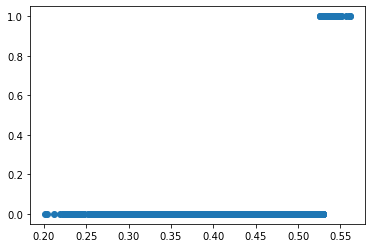

In [297]:
plt.scatter(clean_df[('nrel','capacity_factor')],clean_df[('ML','capacity_class')])

In [296]:
#fclean_df.to_pickle('../app/data/results-2.pkl',protocol = 3)

In [86]:
np.count_nonzero(np.isnan(df[('road','distance')]))

1845

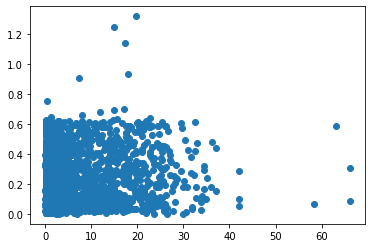

In [84]:
plt.scatter(df[('trans','distance')],df['road','distance'])

In [205]:
import cf_model
existing_df = cf_model.clean_data('../')
existing_df

,elevation,mean_wind_speed,pow_curve,temperature,p_year,t_state,eia_id,t_cap_factor,p_cap_factor,t_cap_factor_18,p_cap_factor_18,t_cap <lambda>,p_cap max,latitude,longitude
0,1163.833252,7.050343,0.442029,285.757263,2004.0,CO,508,0.495920,0.826533,0.161279,0.268798,7.50,4.50,38.033327,-102.537915
1,2061.776123,9.136992,0.573228,278.968262,1999.0,WY,692,0.312108,0.593006,0.317505,0.603259,6.27,3.30,41.835278,-106.242778
2,188.842148,7.063872,0.459379,282.483551,2009.0,IL,944,0.151146,0.151146,0.290601,0.290601,3.00,3.00,41.451494,-90.148547
3,357.343384,7.411217,0.508273,279.763184,2009.0,IA,1172,0.209597,0.209597,0.389498,0.389498,1.50,1.50,43.279722,-92.810556
4,394.538666,8.085404,0.561528,279.575165,2007.0,MN,1998,0.218535,0.209793,0.287196,0.275708,1.20,1.25,43.940500,-94.943400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,605.183228,8.464551,0.595057,286.236420,2018.0,KS,61957,0.257120,0.257120,0.027803,0.027803,243.80,243.80,37.550000,-98.800000
985,286.378479,7.617006,0.523195,282.106049,2018.0,IA,62133,0.136419,0.136419,0.032852,0.032852,200.00,200.00,41.642776,-92.499064
986,330.648590,7.856215,0.551173,281.679626,2018.0,IA,62134,0.259090,0.259090,0.110237,0.110237,170.00,170.00,42.104562,-94.148925
987,258.422333,6.911395,0.447585,280.280579,2012.0,WI,62161,0.225970,0.225970,0.225970,0.225970,9.90,9.90,43.101605,-89.331855


In [219]:
existing_state_locations =  np.array(list(zip(existing_df['latitude'],existing_df['longitude'])))[existing_df.t_state == 'TX']
existing_high_cap_locations = np.array(
    list(zip(existing_df['latitude'],existing_df['longitude']))
)[(existing_df.t_state == 'TX') & existing_df['t_cap_factor'] > 0.3]
# exist_layer = gmaps.symbol_layer(existing_state_locations,
#     fill_opacity=0, stroke_color=(0,0,0), scale=6)
exist_layer = gmaps.heatmap_layer(existing_high_cap_locations, max_intensity=10)

In [203]:
is_high_cap = clean_df[('ML','capacity_class')].astype(np.bool)
point_layer,trans_point_layer,road_point_layer = [
    gmaps.symbol_layer(
        np.array(list(zip(clean_df[(cat,'latitude')],clean_df[(cat,'longitude')])))[is_high_cap],
        fill_color=color, stroke_color=color, scale=2
    ) for cat,color in zip(['nrel','trans','road'],['red','green','blue'])]

In [220]:
fig = gmaps.figure(
    layout={
        'width': '800px',
        'height': '600px',
    })
#fig.add_layer(trans_layer)
fig.add_layer(exist_layer)
fig.add_layer(point_layer)
fig.add_layer(trans_point_layer)
fig.add_layer(road_point_layer)
fig

Figure(layout=FigureLayout(height='600px', width='800px'))